## Tarea 2: Regresión de los casos COVID
Generar un modelo de regresión de los casos confirmados de COVID dentro del Ecuador, el mismo que permita predecir el comportamiento y/o predicción de la pandemia, tomar los datos desde el inicio e identificar etapas: Confinamiento, Toques de Queda, Feriados, etc.

In [423]:
# Importar las librerias para el analasis
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures 
import matplotlib.pyplot as plt

In [424]:
# Datos de contagios por COVID
url = 'https://covid.ourworldindata.org/data/ecdc/new_cases.csv'
df = pd.read_csv(url)
df.sample(10)

,date,World,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,...,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Wallis and Futuna,Western Sahara,Yemen,Zambia,Zimbabwe
74,2020-03-14,10464,NaN,10.0,1.0,1.0,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN
14,2020-01-14,1,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
247,2020-09-03,284989,38.0,122.0,325.0,15.0,75.0,0.0,0.0,10504.0,...,170.0,NaN,0.0,1127.0,2.0,NaN,0.0,14.0,34.0,79.0
311,2020-11-06,612387,40.0,421.0,642.0,90.0,236.0,0.0,0.0,11100.0,...,360.0,NaN,0.0,821.0,0.0,0.0,0.0,0.0,72.0,17.0
232,2020-08-19,258063,0.0,155.0,419.0,0.0,60.0,0.0,0.0,4557.0,...,660.0,NaN,0.0,895.0,6.0,NaN,0.0,4.0,142.0,70.0
305,2020-10-31,542158,157.0,319.0,319.0,98.0,195.0,0.0,3.0,13955.0,...,86.0,NaN,0.0,309.0,0.0,0.0,0.0,0.0,90.0,13.0
109,2020-04-18,82272,51.0,21.0,150.0,14.0,0.0,0.0,0.0,98.0,...,70.0,NaN,0.0,23.0,0.0,NaN,NaN,0.0,4.0,0.0
205,2020-07-23,283889,188.0,68.0,594.0,5.0,30.0,0.0,0.0,5344.0,...,360.0,NaN,0.0,0.0,7.0,NaN,0.0,11.0,257.0,214.0
59,2020-02-28,1271,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
224,2020-08-11,221187,0.0,125.0,498.0,7.0,100.0,0.0,0.0,4688.0,...,725.0,NaN,0.0,0.0,5.0,NaN,0.0,27.0,125.0,99.0


In [425]:
df = df.loc[:,['date','Ecuador']] #Seleccionar la columna correspondiente a la información de Ecuador

# Expresar las fechas en numero de dias desde el 01 Enero del 2020
FMT = '%Y-%m-%d'
date = df['date']
df['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01", FMT)).days)

# Analizando la información correspondiente a Ecuador, me di cuenta que el primer caso confirmado según el DataSet,
# corresponde al 01-03-2020 que corresponde al dia 60, por esto obtenemos la informacion para realizar el analisis
# desde este dia, tambien eliminamos las filas con valores que no estan acorde al analisis, como por ejemplo,
# valores nulos o iguales a 0, e información que esta fuera de contexto.

primerCaso = df.loc[:, 'date'] >= 60 
df = df.loc[primerCaso,]
df = df.dropna()
df = df.drop(df[df['Ecuador']<1].index)
df = df.drop(df[df['Ecuador']>10000].index)
df

,date,Ecuador
61,60,1.0
62,61,5.0
63,62,1.0
65,64,3.0
66,65,3.0
...,...,...
330,329,492.0
331,330,794.0
332,331,908.0
333,332,1396.0


#### Gráfica de la información de contagios en Ecuador desde el 01/03/2020 hasta el 29/11/2020

<AxesSubplot:xlabel='date'>

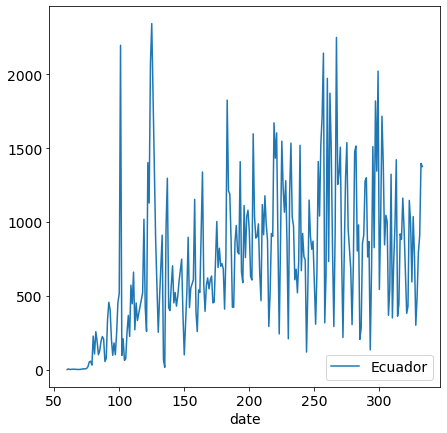

In [426]:
df.plot(x ='date', y='Ecuador')

In [427]:
x = list(df.iloc [:, 0]) # Fecha
y = list(df.iloc [:, 1]) # Numero de casos

## Regresión lineal

La regresión lineal es un algoritmo de aprendizaje supervisado que se utiliza en Machine Learning y en estadística. En su versión más sencilla, lo que haremos es «dibujar una recta» que nos indicará la tendencia de un conjunto de datos continuos.

Recordemos rápidamente la fórmula de la recta:

Y = mX + b

Donde Y es el resultado, X es la variable, m la pendiente (o coeficiente) de la recta y b la constante o también conocida como el «punto de corte con el eje Y» en la gráfica (cuando X=0).

In [428]:
# Creamos el objeto de Regresión Lineal
regr = linear_model.LinearRegression()
 
# Entrenamos nuestro modelo
regr.fit(np.array(x).reshape(-1, 1) ,y)

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)

Coefficients: 
 [3.07017619]
Independent term: 
 129.71476028519646


In [429]:
#Vamos a comprobar:
# Quiero predecir cuántos "Casos" hay en la fecha actual 24/04/2021,
# según nuestro modelo, hacemos:
y_prediccion = regr.predict([[479]])
print("Prediccion para la fecha 24/04/2021:")
print(int(y_prediccion))

Prediccion para la fecha 24/04/2021:
1600


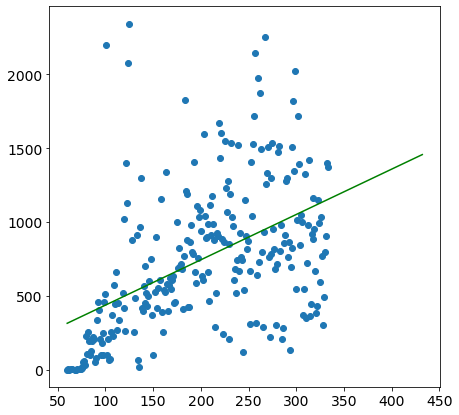

In [430]:
#Graficar
plt.scatter(x, y)
x_real = np.array(range(min(x), max(x)+100))
plt.plot(x_real, regr.predict(x_real.reshape(-1, 1)), color='green')
plt.show()

## Regresión logística

El modelo logístico se ha utilizado ampliamente para describir el crecimiento de una población. Una infección puede describirse como el crecimiento de la población de un agente patógeno, por lo que un modelo logístico parece razonable. La expresión más genérica de una función logística es:

a + b * log(x)

En esta fórmula, tenemos la variable x que es el tiempo y tres parámetros: a, b, c .

* a se refiere a la velocidad de infección
* b es el día en que ocurrieron las infecciones máximas
* c es el número total de personas infectadas registradas al final de la infección

In [431]:
def modelo_logistico(x,a,b):
    return a+b*np.log(x)

log_fit = curve_fit(modelo_logistico,x,y) #Extraemos los valores de los paramatros
print(log_fit)

(array([-2290.65922776,   582.88046454]), array([[ 94591.70270868, -18005.18603871],
       [-18005.18603871,   3453.17534799]]))


In [432]:
#Vamos a comprobar:
# Quiero predecir cuántos "Casos" hay en la fecha actual 24/04/2021,
# según nuestro modelo, hacemos:
prediccion_reg = modelo_logistico(479,log_fit[0][0],log_fit[0][1])
print("Prediccion para la fecha 24/04/2021:")
print(int(prediccion_reg))

Prediccion para la fecha 24/04/2021:
1306


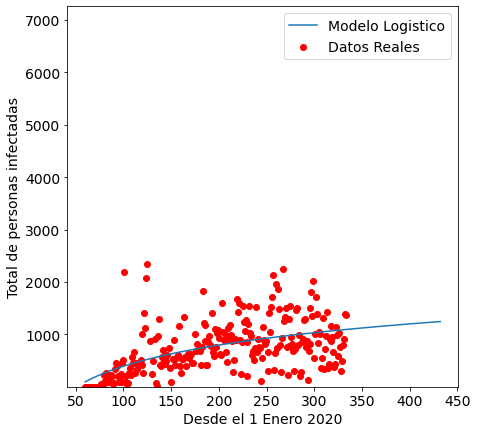

In [433]:
pred_x = list(range(min(x),max(x)+100)) # Predecir 50 dias mas
plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=14)
# Real data
plt.scatter(x,y,label="Datos Reales",color="red")
# Predicted exponential curve
plt.plot(pred_x, [modelo_logistico(i,log_fit[0][0],log_fit[0][1]) for i in pred_x], label="Modelo Logistico" )
plt.legend()
plt.xlabel("Desde el 1 Enero 2020")
plt.ylabel("Total de personas infectadas")
plt.ylim((min(y)*0.9,max(y)*3.1)) # Definir los limites de Y
plt.show()

## Regresión polinómica

Predicción de una variable de respuesta cuantitativa a partir de una variable predictora cuantitativa, donde la relación se modela como una función polinomial de orden n (esto significa que pueden tener de diferentes exponenciales o grados y se debe ir probando)

Se puede tener una ecuacion con diferentes grados

y = a0 + a1x + a2x^2 + a3x^3 + … + anx^n + ε

In [434]:
pf = PolynomialFeatures(degree = 8)
XPoly = pf.fit_transform(np.array(x).reshape(-1, 1))
regresion_lineal = linear_model.LinearRegression()
regresion_lineal.fit(XPoly, y)
print('w = ' + str(regresion_lineal.coef_) + ', b = ' + str(regresion_lineal.intercept_))

w = [ 0.00000000e+00 -3.63004093e-09  5.80215143e-09  5.16136486e-07
  2.57485413e-05 -3.63358685e-07  1.97816137e-09 -4.84078587e-12
  4.45113448e-15], b = -127.96741197713709


In [435]:
#Vamos a comprobar:
# Quiero predecir cuántos "Casos" hay en la fecha actual 24/04/2021,
# según nuestro modelo, hacemos:
yPoly_prediccion = regresion_lineal.predict(pf.fit_transform([[479]]))
print("Prediccion para la fecha 24/04/2021:")
print(int(yPoly_prediccion))

Prediccion para la fecha 24/04/2021:
414740


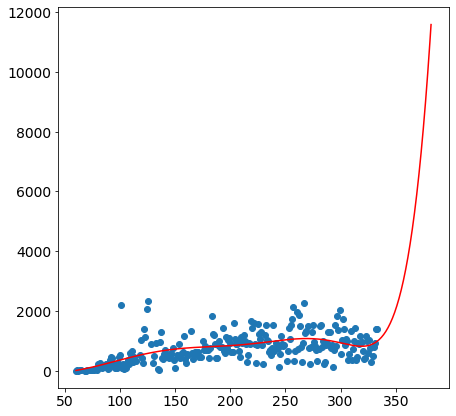

In [436]:
#Graficar
plt.scatter(x, y)
x_real = np.array(range(min(x), max(x)+50))
plt.plot(x_real, regresion_lineal.predict(pf.fit_transform(x_real.reshape(-1, 1))), color='red')
plt.show()